[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/PythonForFinance/blob/master/2018-10-13%20Complete%20Portfolio%20Optimization.ipynb)

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#pyplot had to be imported

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly

In [0]:
symbols = ['AAPL', 'MSFT', 'FB', 'DB', 'GLD']
noa = len(symbols)
# this is a list that will then be looped for a dataframe

In [80]:
type(noa)

int

In [0]:
start = datetime.datetime(2013, 4, 28)
#datetime for pulling quotes

In [0]:
end = datetime.datetime(2018, 10, 3)

In [83]:
f = web.DataReader('RY', 'iex', start, end)
f.head(1)
#check if the Datareader is working

,open,high,low,close,volume
date,,,,,
2013-10-14,53.6897,53.9762,53.5588,53.8534,163027


In [85]:
data = pd.DataFrame()
for sym in symbols:
 data[sym] = web.DataReader(sym, data_source='iex', start=start, end=end)['close']
data.columns = symbols
#loop that creates a dataframe
data.head(1)

,AAPL,MSFT,FB,DB,GLD
date,,,,,
2013-10-14,64.8841,30.4496,49.51,45.4004,122.83


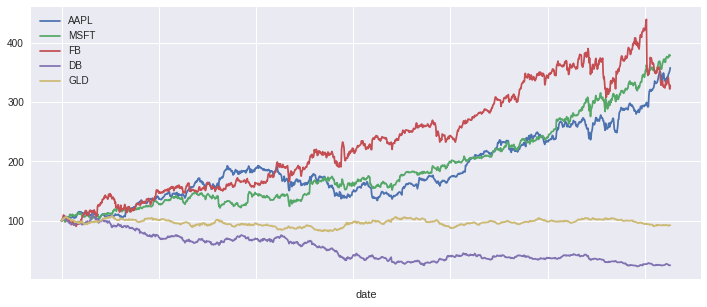

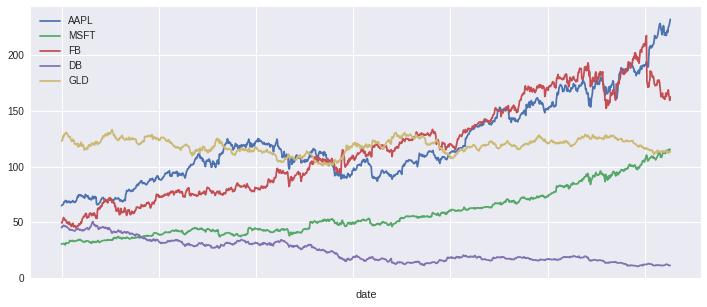

In [87]:
(data / data.iloc[0] * 100).plot(figsize=(12, 5))
(data).plot(figsize=(12, 5))
#ix is depreciated, replaced by iloc
#this normals the data to a zero base


In [88]:
rets = np.log(data / data.shift(1))
#new column for returns based on position above
#this uses log returns
rets.info()
#info show that the dataframe is empty for the first column, there's no shift down
rets.head(2)
#check for log returns 
#for NFLX the simple return 0.012165
#log returns are lower when positive and higher when negative (until infinite)
#they're also symmetrical

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 2013-10-14 to 2018-10-03
Data columns (total 5 columns):
AAPL    1252 non-null float64
MSFT    1252 non-null float64
FB      1252 non-null float64
DB      1252 non-null float64
GLD     1252 non-null float64
dtypes: float64(5)
memory usage: 58.7+ KB


,AAPL,MSFT,FB,DB,GLD
date,,,,,
2013-10-14,NaN,NaN,NaN,NaN,NaN
2013-10-15,0.005308,0.001159,-0.000202,-0.003084,0.0073


In [89]:
rets.mean() * 252
#simple arithmetic mean 

AAPL    0.256516
MSFT    0.267767
FB      0.239133
DB     -0.279565
GLD    -0.016043
dtype: float64

In [90]:
rets.cov()*252
#covariance happens on the daily
#there are copies of figures AAPL & NFLX = NFLX & AAPL

,AAPL,MSFT,FB,DB,GLD
AAPL,0.051001,0.022436,0.024651,0.019908,-0.002465
MSFT,0.022436,0.048254,0.027137,0.022987,-0.002618
FB,0.024651,0.027137,0.088309,0.024001,-0.002919
DB,0.019908,0.022987,0.024001,0.126404,-0.007916
GLD,-0.002465,-0.002618,-0.002919,-0.007916,0.018422


In [91]:
weights = np.random.random(noa)
weights /= np.sum(weights)
#new numpy array of 4 random number that add up to 1
#second line assures weight are equal to 1
weights

array([0.37981196, 0.08063116, 0.00882169, 0.13919933, 0.39153586])

In [92]:
np.sum(rets.mean() * weights) * 252
#using FANG Sept 2018 returns if FB is a high weighting, low returns, NFLX high weighting, higher returns

0.07593128288466836

In [93]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
#rets is a pandas dataframe, weights is a numpy array 
#in order to work the size of the two arrays need to be equal 
#this only works with a dot in a dot which is a numpy array

0.015427682967010165

In [94]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.12420822423257714

In [0]:
prets = []
pvols = []
#prets and vols are np.arrays
for p in range (5000):
 #loop underlines number of iterations for a random waiting
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 #this makes it equal to 1
 prets.append(np.sum(rets.mean() * weights) * 252)
 #i get a value for each loop
 pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
  #covariance value for each loop

prets = np.array(prets)
pvols = np.array(pvols)
#turns prets and pvols from lists into numpy arrays

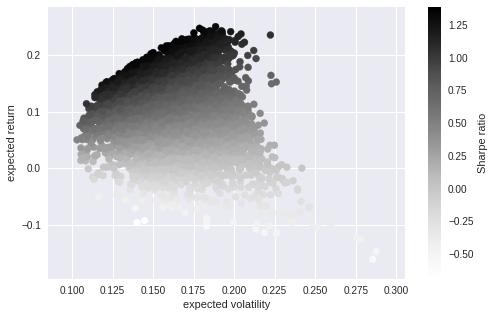

In [98]:
plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets, c = prets / pvols, marker='o')
# c is a calculated column of a sharpe ratio minus a risk free rate
# x-axis, y-axis, marker allows me to change the point style
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [0]:
def statistics(weights):
 weights = np.array(weights)
 pret = np.sum(rets.mean() * weights) * 252
 pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
 return np.array([pret, pvol, pret / pvol])
 #this is a callable function that repeats work above

In [0]:
import scipy.optimize as sco
#this is a module

In [0]:
def min_func_sharpe(weights):
 return -statistics(weights)[2]
#I think this is calling the eariler function - without the [2], the minimization crashes

In [0]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
#this is a dictionary with two objects, that constrains the optimization

In [0]:
bnds = tuple((0, 1) for x in range(noa))
#tuple, like a list, for each stock between 0 and 1 - this is bounds

In [105]:
noa * [1. / noa,]
#equal distribution of weight that sum to 1 


[0.2, 0.2, 0.2, 0.2, 0.2]

In [106]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
#this is a scipy function, calls stats function, then a list of weighting, a type of minimization, bounds are required as list,

CPU times: user 49.8 ms, sys: 1.06 ms, total: 50.9 ms
Wall time: 53.6 ms


In [108]:
opts

     fun: -1.3968398220253364
     jac: array([ 8.71270895e-05, -1.06677413e-04,  5.98728657e-05,  2.43234631e+00,
        4.85569239e-04])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.96504258e-01, 4.86386946e-01, 9.28554780e-02, 6.66784336e-17,
       2.42533174e-02])

In [109]:
opts['x'].round(3)
#creates nparray based on key 'x' from the optimization, and rounds to 3 digits

array([0.397, 0.486, 0.093, 0.   , 0.024])

In [110]:
statistics(opts['x']).round(3)

array([0.254, 0.182, 1.397])

In [0]:
def min_func_variance(weights):
 return statistics(weights)[1] ** 2

In [112]:
%%time
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP', bounds=bnds,
constraints=cons)

CPU times: user 82.1 ms, sys: 930 µs, total: 83.1 ms
Wall time: 84.2 ms


In [113]:
optv['x'].round(3)

array([0.125, 0.132, 0.044, 0.07 , 0.628])

In [114]:
statistics(optv['x']).round(3)

array([0.048, 0.101, 0.475])

In [0]:
#EFFICIENT FRONTIER

In [0]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)
#normal bounds for optimization

In [0]:
def min_func_port(weights):
 return statistics(weights)[1]

In [118]:
%%time
trets = np.linspace(0.0, 0.25, 50)
#50 iterations, and the bounds
tvols = []
for tret in trets:
 cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
 res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
 tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.84 s, sys: 1.64 ms, total: 4.84 s
Wall time: 4.84 s


In [121]:
tvols

array([0.10468596, 0.1040415 , 0.10346516, 0.102958  , 0.10252149,
       0.10215518, 0.10186147, 0.1016396 , 0.10149104, 0.10141572,
       0.1014138 , 0.10148532, 0.10163029, 0.10184824, 0.10213869,
       0.10250101, 0.10293445, 0.1034381 , 0.10401094, 0.10465259,
       0.10535974, 0.10615359, 0.10711873, 0.10825873, 0.10956815,
       0.11104095, 0.11267079, 0.11445091, 0.11637442, 0.11843435,
       0.12062371, 0.12293567, 0.12536318, 0.12789993, 0.13053954,
       0.1332758 , 0.13610291, 0.13901535, 0.14200786, 0.14507488,
       0.14821281, 0.1514168 , 0.15468275, 0.15800682, 0.1613854 ,
       0.16481516, 0.16829296, 0.17181588, 0.17538121, 0.17898641])

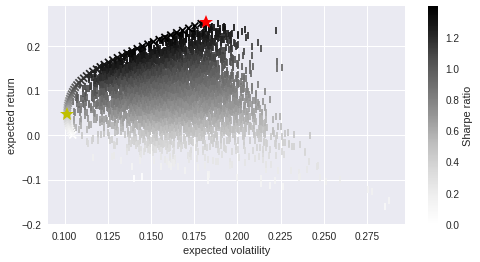

In [129]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
 c=prets / pvols, marker='|')
 # random portfolio composition
plt.scatter(tvols, trets,
 c=trets / tvols, marker='x')
 # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
 'r*', markersize=15.0)
 # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
 'y*', markersize=15.0)
 # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [0]:
#CAPITAL MARKET LINE

In [0]:
import scipy.interpolate as sci

In [0]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [0]:
tck = sci.splrep(evols, erets)

In [0]:
def f(x):
#Efficient frontier function (splines approximation)
 return sci.splev(x, tck, der=0)
def df(x):
#First derivative of efficient frontier function
 return sci.splev(x, tck, der=1)

In [0]:
def equations(p, rf=0.01):
 eq1 = rf - p[0]
 eq2 = rf + p[1] * p[2] - f(p[2])
 eq3 = p[1] - df(p[2])
 return eq1, eq2, eq3

In [0]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [149]:
opt

array([0.01      , 1.34454035, 0.205983  ])

In [150]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

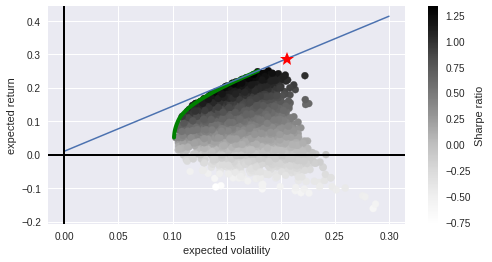

In [153]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
 c=(prets - 0.01) / pvols, marker='o')
 # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
 # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
 # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='-', lw=2.0)
plt.axvline(0, color='k', ls='-', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')